# MLB 85/1-3-2

* [Verteilung der Funde](#Verteilung-der-Funde)
* [Keramische Stilgruppen](#Keramische-Stilgruppen)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

In [2]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MLB')
           AND ((t_Komplex.bef_nr) = '85/1-3-2'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
df = df.dropna(subset=['Tiefe'])
display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Gewicht,Anzahl,Gr_Clist,Art,Tiefe
0,MLB,85/1-3-2,-1:1,,35,1,70,K,"0,5"
1,MLB,85/1-3-2,-2:3,BatMLB (?),26,1,70,K,"0,65"
2,MLB,85/1-3-2,-3:37,BatMLB,32,1,70,K,"0,8"
3,MLB,85/1-3-2,-4:9,,52,1,70,K,"1,05"
4,MLB,85/1-3-2,-5:24,BatMLB (?),9,1,70,K,"1,17"


In [3]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Art', aggfunc = sum, fill_value = 0)
df_pivot.rename(columns={'HL': 'Hüttenlehm', 'K': 'Keramik'}, inplace=True)
df_pivot

Art,Hüttenlehm,Keramik,Stein
Tiefe,,,
"0,5",0,365,0
"0,65",0,385,0
"0,8",399,1018,0
"1,05",0,379,0
"1,17",0,575,239


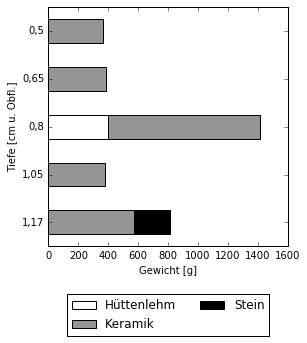

In [5]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Greys')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-2_MLB85-132_VerteilungFunde.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MLB 85/1-3-2** Fundverteilung

In [5]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-02_MLB85-1-3-2_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,gebrannter Lehm,2,1.8,0.40,11.9
1,Keramik,108,97.3,2.72,81.0
2,Stein,1,0.9,0.24,7.1


## Keramische Stilgruppen

In [6]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MLB')
           AND ((t_Komplex.bef_nr) = '85/1-3-2')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
df['Typ'] = df['Typ'].replace('','(?)')
df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
df = df.dropna(subset=['Tiefe'])
display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe
0,MLB,85/1-3-2,-1:1,(?),35,70,K,"0,5"
1,MLB,85/1-3-2,-2:3,BatMLB (?),26,70,K,"0,65"
2,MLB,85/1-3-2,-3:37,BatMLB,32,70,K,"0,8"
3,MLB,85/1-3-2,-4:9,(?),52,70,K,"1,05"
4,MLB,85/1-3-2,-5:24,BatMLB (?),9,70,K,"1,17"


In [7]:
np.sum(df['Gewicht'])

2722

In [8]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ', aggfunc = sum, fill_value = 0)
df_pivot

Typ,(?),BatMLB,BatMLB (?),NGB (?)
Tiefe,,,,
"0,5",76,189,100,0
"0,65",43,299,26,0
"0,8",99,866,31,0
"1,05",87,246,0,0
"1,17",69,441,31,34


> ToDo: evtl. Chronologieschema zur Abfolge der Stilgruppen in die DB ablegen

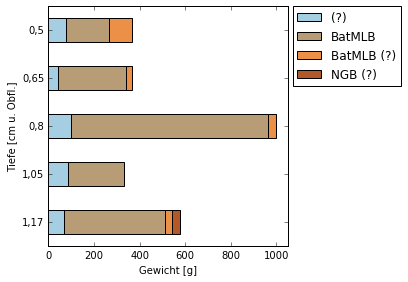

In [16]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.xlim(0,1050)
plt.gca().set_aspect((abs(xlim[0]) + 1050) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-2_MLB85-132_KeramikStilgruppen.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MLB 85/1-3-2** keramische Stilgruppen

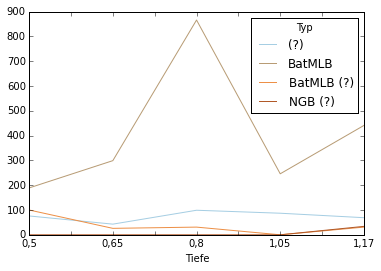

In [9]:
df_pivot.plot(kind = 'line', cmap = 'Paired')

In [10]:
df_pivot.plot(kind = 'area', cmap = 'Paired')

## Fragmentierung

* Einträge ohne Größen-Angabe (die ausgezählten Stücke) sind nicht mit dabei

In [17]:
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MLB')
           AND ((t_Komplex.bef_nr) = '85/1-3-2')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Gr_Clist) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
df = df.dropna(subset=['Tiefe'])
display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,objID,Gewicht,Gr_Clist,Tiefe
0,276,35,70,"0,5"
1,277,26,70,"0,65"
2,278,32,70,"0,8"
3,279,52,70,"1,05"
4,280,9,70,"1,17"


In [18]:
df_pivot = df.pivot_table(values = 'objID', index = 'Tiefe', columns = 'Gr_Clist', aggfunc = len)
df_pivot

Gr_Clist,30,70,120
Tiefe,,,
"0,5",1,3,1
"0,65",8,7,2
"0,8",4,16,3
"1,05",1,4,1
"1,17",7,9,1


In [19]:
df_pivot.plot(kind = 'line')
plt.xlabel('Tiefe [cm u. Obfl.]')
plt.ylabel('Anzahl')
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=3, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-2_MLB85-132_KeramikFragmentierung.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MLB 85/1-3-2** Fragmentierung
> 
> Stimmt nicht mit Excel-Fassung überein

In [20]:
# Diagramm auf 100% - Prozentwerte für jede Zeile ausrechnen:
df_perc = df_pivot.divide(df_pivot.sum(axis=1), axis=0)
# df_perc

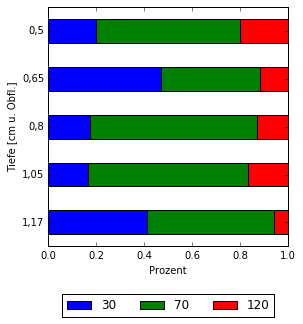

In [22]:
ax = df_perc.plot(kind = 'barh', stacked = True)
plt.xlabel('Prozent')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.ylabel('Tiefe [cm u. Obfl.]')
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=3, borderaxespad = 0.)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../output/figs/9-2_MLB85-132_KeramikFragmentierung_B.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Verzierungselemente

In [16]:
sql = """SELECT
            t_Ort.ort_kurz,
            t_Komplex.bef_nr,
            t_Obj.objID,
            t_Obj.Komplex,
            t_Obj.Individuum,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            INNER JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            INNER JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Ort.ort_kurz) = 'MLB')
            AND ((t_Komplex.bef_nr) = '85/1-3-2')
            AND ((t_Obj.Art) = "K")
            AND ((t_K_Verz.verzName) Like 'V%')
            AND ((t_K_Pos.posID)<>1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [17]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len, fill_value = 0)
df_pivot

verzName,V01a,V01c,V01d,V01e,V01e2,V02a,V02b,V02c,V03a,V03b,...,V06b,V09a1,V09a3,V09b,V09c1,V09c2,V09i,V11a,V11b2,V12a1
pos,,,,,,,,,,,,,,,,,,,,,
1 Innen,18,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2 Rand,2,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3 Oberteil,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4 Hals,17,0,0,0,1,1,0,2,0,2,...,1,2,0,0,1,1,1,1,2,3
5 Schulter,12,3,0,1,0,0,0,1,0,2,...,0,1,0,1,0,0,1,0,0,0
6 Bauch,9,1,2,6,1,1,1,4,2,6,...,0,1,1,0,0,0,1,0,0,4
7 Unterteil,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_pivot = df_pivot.sort_index(ascending=True)

In [19]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
plt.rcdefaults()
%matplotlib inline

In [20]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/9-2_MLB85-132_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

> **MLB 85/1-3-2** Verzierungselemente

n

In [21]:
df['objID'].nunique()

49

In [22]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Reds')